In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [2]:
picks = pd.read_csv('picks.csv')

## Data Cleaning and Visualization

### Picks

In [302]:
picks.head()

date               team_1          team_2  inverted_teams  match_id  \
0  2020-03-18              TeamOne         Recon 5               1   2340454   
1  2020-03-18              Rugratz  Bad News Bears               0   2340453   
2  2020-03-18  New England Whalers        Station7               0   2340461   
3  2020-03-17           Complexity           forZe               1   2340279   
4  2020-03-17          Singularity        Endpoint               0   2340456   

   event_id best_of  system t1_removed_1 t1_removed_2 t1_removed_3  \
0      5151       3  123412      Vertigo        Train          0.0   
1      5151       3  123412        Dust2         Nuke          0.0   
2      5243       1  121212       Mirage        Dust2      Vertigo   
3      5226       3  123412      Inferno         Nuke          0.0   
4      5247       3  123412        Train       Mirage          0.0   

  t2_removed_1 t2_removed_2 t2_removed_3 t1_picked_1 t2_picked_1 left_over  
0         Nuke     Overpass          0.0       Dust2     Inferno    Mirage  
1       Mirage        Train          0.0     Vertigo     Inferno  Overpass  
2         Nuke        Train     Overpass         0.0         0.0   Inferno  
3     Overpass      Vertigo          0.0       Dust2       Train    Mirage  
4         Nuke      Inferno          0.0    Overpass     Vertigo     Dust2

In [303]:
picks['date'] = pd.to_datetime(picks['date'])

In [304]:
picks['best_of'].value_counts()

3            10142
1             5656
2              224
of               3
3(LAN)           3
3.               3
1(Online)        2
2(Online)        1
3(Online)        1
Name: best_of, dtype: int64

We only want to consider best of 3 matches as they are the most commonly played in important tournaments 

In [305]:
picks.at[picks['best_of'] ==  '3.', 'best_of'] = '3'
picks.at[picks['best_of'] ==  'of', 'best_of'] = '3'
picks.at[picks['best_of'] ==  '3(LAN)', 'best_of'] = '3'
picks.at[picks['best_of'] ==  '3(Online)', 'best_of'] = '3'

In [306]:
picks = picks[picks['best_of'] == '3']
picks.drop(['best_of', 't1_removed_3', 't2_removed_3', 'inverted_teams', 'system'], axis=1, inplace=True)

In [307]:
picks.head()

date       team_1          team_2  match_id  event_id t1_removed_1  \
0 2020-03-18      TeamOne         Recon 5   2340454      5151      Vertigo   
1 2020-03-18      Rugratz  Bad News Bears   2340453      5151        Dust2   
3 2020-03-17   Complexity           forZe   2340279      5226      Inferno   
4 2020-03-17  Singularity        Endpoint   2340456      5247        Train   
5 2020-03-17          BIG          fnatic   2340397      5226        Train   

  t1_removed_2 t2_removed_1 t2_removed_2 t1_picked_1 t2_picked_1 left_over  
0        Train         Nuke     Overpass       Dust2     Inferno    Mirage  
1         Nuke       Mirage        Train     Vertigo     Inferno  Overpass  
3         Nuke     Overpass      Vertigo       Dust2       Train    Mirage  
4       Mirage         Nuke      Inferno    Overpass     Vertigo     Dust2  
5        Dust2         Nuke      Vertigo     Inferno    Overpass    Mirage

find out most picked maps

In [308]:
picks['t1_picked_1'].value_counts()

Mirage         1958
Inferno        1711
Train          1361
Overpass       1330
Nuke           1093
Dust2           960
Cache           902
Cobblestone     587
Vertigo         225
0.0              25
Name: t1_picked_1, dtype: int64

In [309]:
picks = picks.drop(picks[picks['t1_picked_1'] == '0.0'].index)

In [310]:
picks['t2_picked_1'].value_counts()

Mirage         1938
Inferno        1727
Train          1462
Overpass       1328
Nuke           1135
Dust2           980
Cache           817
Cobblestone     523
Vertigo         210
0.0               6
left)             1
Name: t2_picked_1, dtype: int64

In [311]:
picks = picks.drop(picks[picks['t2_picked_1'] == '0.0'].index)
picks = picks.drop(picks[picks['t2_picked_1'] == 'left)'].index)

In [312]:
picks['left_over'].value_counts()

Mirage         1872
Inferno        1823
Train          1753
Overpass       1188
Dust2          1026
Nuke            903
Cache           830
Cobblestone     563
Vertigo         149
Royal             1
Grayhound         1
Luminosity        1
Big               1
Envy              1
Vega              1
Gorilla           1
Brute             1
Alma              1
BLITZKRIEG        1
Ripple            1
ENCE              1
MK                1
Name: left_over, dtype: int64

In [313]:
maps = ['Mirage', 'Inferno', 'Train', 'Overpass', 'Dust2', 'Nuke', 'Cache', 'Cobblestone', 'Vertigo']
picks = picks.drop(picks[~picks['left_over'].isin(maps)].index)

In [314]:
picks.head()

date       team_1          team_2  match_id  event_id t1_removed_1  \
0 2020-03-18      TeamOne         Recon 5   2340454      5151      Vertigo   
1 2020-03-18      Rugratz  Bad News Bears   2340453      5151        Dust2   
3 2020-03-17   Complexity           forZe   2340279      5226      Inferno   
4 2020-03-17  Singularity        Endpoint   2340456      5247        Train   
5 2020-03-17          BIG          fnatic   2340397      5226        Train   

  t1_removed_2 t2_removed_1 t2_removed_2 t1_picked_1 t2_picked_1 left_over  
0        Train         Nuke     Overpass       Dust2     Inferno    Mirage  
1         Nuke       Mirage        Train     Vertigo     Inferno  Overpass  
3         Nuke     Overpass      Vertigo       Dust2       Train    Mirage  
4       Mirage         Nuke      Inferno    Overpass     Vertigo     Dust2  
5        Dust2         Nuke      Vertigo     Inferno    Overpass    Mirage

#### Note that even there there are 9 maps listed here, competitive CS:GO's map pool is set at 7 at a given time. Cache and Cobblestone were replaced with Nuke and Vertigo at seperate times.

#### In a best of 3 match the map pick/veto system is as follows: <br> <br> Team 1 Veto, <br> Team 2 Veto, <br> <br> Team 1 Pick, <br> Team 2 Pick, <br> <br> Team 1 Veto, <br> Team 2 Veto, <br> <br> Final Map Left Over 

The map pick/veto system is not consistently in this order, however it is the common system used.

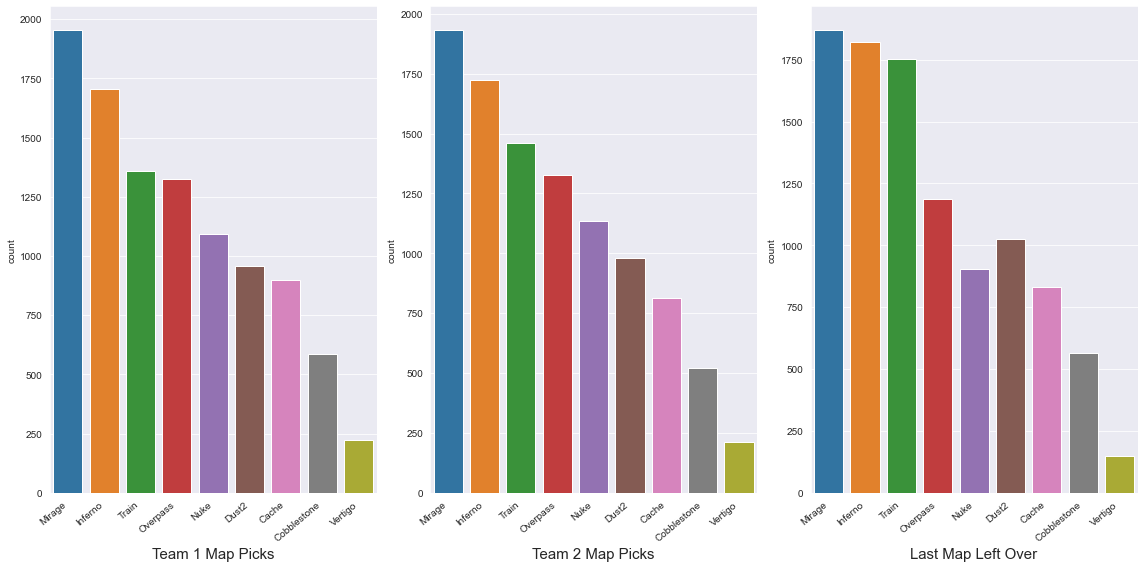

In [315]:
maps = ['Mirage', 'Inferno', 'Train', 'Overpass', 'Nuke', 'Dust2', 'Cache', 'Cobblestone', 'Vertigo']
sns.set_style('darkgrid')
f, ax = plt.subplots(1,3,figsize=(16,8))

sns.countplot(x='t1_picked_1', data=picks, ax=ax[0], order=maps)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_xlabel('Team 1 Map Picks', fontsize=15)

sns.countplot(x='t2_picked_1', data=picks, ax=ax[1], order=maps)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
ax[1].set_xlabel('Team 2 Map Picks', fontsize=15)

sns.countplot(x='left_over', data=picks, ax=ax[2], order=maps)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")
ax[2].set_xlabel('Last Map Left Over', fontsize=15)
plt.tight_layout()

The two different sides a team can be on has no effect on what map is picked and the left over map has only a slight difference where Dust2 and Nuke are switched

Now to look at the map bans and see the frequency of the maps that have been banned in the 1st and 2nd rotations

In [316]:
print(picks['t1_removed_1'].value_counts())
print('')
print(picks['t1_removed_2'].value_counts())

Nuke           2195
Overpass       1571
Train          1275
Cache          1059
Inferno         898
Dust2           890
Vertigo         849
Mirage          834
Cobblestone     536
Name: t1_removed_1, dtype: int64

Overpass       1603
Train          1529
Nuke           1336
Mirage         1210
Inferno        1197
Dust2          1145
Cache          1075
Cobblestone     510
Vertigo         492
0.0              10
Name: t1_removed_2, dtype: int64


In [317]:
print(picks['t2_removed_1'].value_counts())
print('')
print(picks['t2_removed_2'].value_counts())

Nuke           2187
Overpass       1550
Train          1222
Cache          1212
Dust2           875
Mirage          865
Vertigo         817
Inferno         809
Cobblestone     569
0.0               1
Name: t2_removed_1, dtype: int64

Overpass       1540
Train          1505
Mirage         1434
Nuke           1243
Inferno        1232
Dust2          1108
Cache          1027
Cobblestone     564
Vertigo         449
0.0               5
Name: t2_removed_2, dtype: int64


In [318]:
picks = picks.drop(picks[picks['t1_removed_2'] == '0.0'].index)
picks = picks.drop(picks[picks['t2_removed_1'] == '0.0'].index)
picks = picks.drop(picks[picks['t2_removed_2'] == '0.0'].index)

[Text(0, 0, 'First Veto'), Text(1, 0, 'Second Veto')]

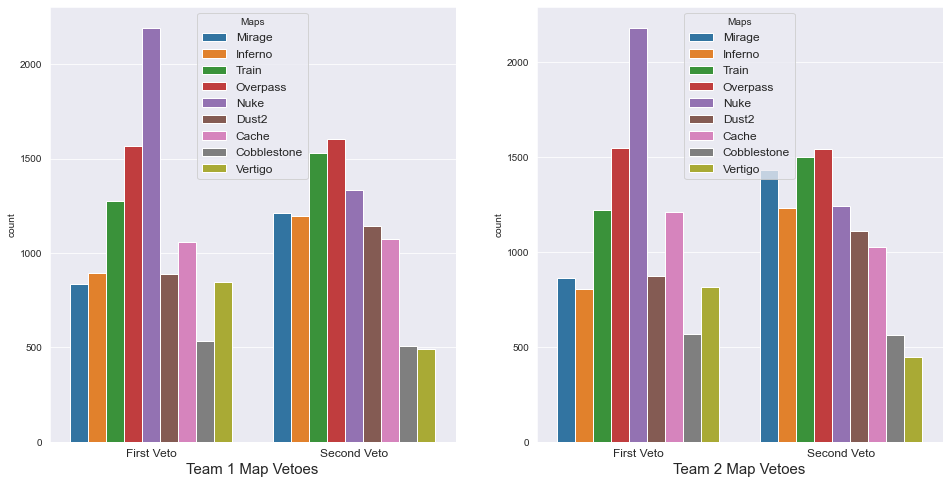

In [319]:
maps = ['Mirage', 'Inferno', 'Train', 'Overpass', 'Nuke', 'Dust2', 'Cache', 'Cobblestone', 'Vertigo']
f, ax = plt.subplots(1,2,figsize=(16,8))
melt_df_1 = picks[['t1_removed_1', 't1_removed_2']]
melt_df_2 = picks[['t2_removed_1', 't2_removed_2']]

sns.countplot(x='variable', hue='value', data=pd.melt(melt_df_1), ax=ax[0], hue_order=maps)
ax[0].set_xlabel('Team 1 Map Vetoes', fontsize=15)
ax[0].legend(title='Maps', fontsize=12)
ax[0].set_xticklabels(['First Veto', 'Second Veto'], fontsize=12)

sns.countplot(x='variable', hue='value', data=pd.melt(melt_df_2), ax=ax[1], hue_order=maps)
ax[1].set_xlabel('Team 2 Map Vetoes', fontsize=15)
ax[1].legend(loc='upper center', title='Maps', fontsize=12)
ax[1].set_xticklabels(['First Veto', 'Second Veto'], fontsize=12)

From this plot we can see that in each rotation of the vetoes both teams have very similar picks and that the maps vetoed in each stage do differ, which may have to do with what maps were vetoed 
and picked in the first rotations of vetoes and picks.

In [320]:
picks.head()

date       team_1          team_2  match_id  event_id t1_removed_1  \
0 2020-03-18      TeamOne         Recon 5   2340454      5151      Vertigo   
1 2020-03-18      Rugratz  Bad News Bears   2340453      5151        Dust2   
3 2020-03-17   Complexity           forZe   2340279      5226      Inferno   
4 2020-03-17  Singularity        Endpoint   2340456      5247        Train   
5 2020-03-17          BIG          fnatic   2340397      5226        Train   

  t1_removed_2 t2_removed_1 t2_removed_2 t1_picked_1 t2_picked_1 left_over  
0        Train         Nuke     Overpass       Dust2     Inferno    Mirage  
1         Nuke       Mirage        Train     Vertigo     Inferno  Overpass  
3         Nuke     Overpass      Vertigo       Dust2       Train    Mirage  
4       Mirage         Nuke      Inferno    Overpass     Vertigo     Dust2  
5        Dust2         Nuke      Vertigo     Inferno    Overpass    Mirage

In [367]:
picks[picks['t1_removed_1'] == 'Nuke']

date       team_1   team_2  match_id  event_id t1_removed_1  \
11    2020-03-17  HellRaisers      AGO   2340449      5150         Nuke   
39    2020-03-15       Incept  I sleep   2340436      5248         Nuke   
40    2020-03-15     Endpoint  Tricked   2340329      5247         Nuke   
43    2020-03-14      Paradox    ORDER   2340282      5236         Nuke   
51    2020-03-14         Envy    Gen.G   2340339      5242         Nuke   
...          ...          ...      ...       ...       ...          ...   
15981 2016-08-11   Complexity   Blight   2303836      2364         Nuke   
15983 2016-08-10           MK   Spirit   2303826      2329         Nuke   
15988 2016-08-09      GODSENT        X   2303858      2329         Nuke   
15998 2016-07-27       Exile5     GUTS   2303537      2301         Nuke   
16002 2016-07-25          SYF   Reload   2303540      2301         Nuke   

      t1_removed_2 t2_removed_1 t2_removed_2 t1_picked_1  t2_picked_1  \
11          Mirage     Overpass        Dust2     Inferno        Train   
39        Overpass        Train       Mirage       Dust2      Vertigo   
40         Inferno      Vertigo     Overpass       Dust2        Train   
43           Train     Overpass        Dust2     Inferno      Vertigo   
51         Vertigo     Overpass        Dust2       Train      Inferno   
...            ...          ...          ...         ...          ...   
15981        Dust2       Mirage  Cobblestone       Cache     Overpass   
15983  Cobblestone        Train     Overpass       Dust2       Mirage   
15988     Overpass        Cache       Mirage       Train        Dust2   
15998     Overpass  Cobblestone        Cache       Train        Dust2   
16002     Overpass        Dust2        Cache       Train  Cobblestone   

         left_over  
11         Vertigo  
39         Inferno  
40          Mirage  
43          Mirage  
51          Mirage  
...            ...  
15981        Train  
15983        Cache  
15988  Cobblestone  
15998       Mirage  
16002       Mirage  

[2193 rows x 12 columns]

Some takeaways from these visualizations:
- Mirage and Inferno are the most played maps and most popular map picks from 2016-2020, with Train and Overpass close behind.
- Nuke is by far the most popular first rotation map veto for either team. 
- Dust2, Cache, Cobblestone, and Vertigo underperform in map picks/vetoes since they were not consistently included in the map pools of the tournaments that ran from 2016-2020.
- In the case of Vertigo, which was only added in 2019, we will look closer to the matches played from its introduction to where the data ends.

In [323]:
# Find the first date which Vertigo appears as a map veto, pick, or left over
picks[picks.isin(['Vertigo']).any(axis=1)]['date'].tail(1)

4712   2019-04-02
Name: date, dtype: datetime64[ns]

In [324]:
vertigo_df = picks[picks['date'] >= '2019-04-02']

In [325]:
vertigo_df.head()

date       team_1          team_2  match_id  event_id t1_removed_1  \
0 2020-03-18      TeamOne         Recon 5   2340454      5151      Vertigo   
1 2020-03-18      Rugratz  Bad News Bears   2340453      5151        Dust2   
3 2020-03-17   Complexity           forZe   2340279      5226      Inferno   
4 2020-03-17  Singularity        Endpoint   2340456      5247        Train   
5 2020-03-17          BIG          fnatic   2340397      5226        Train   

  t1_removed_2 t2_removed_1 t2_removed_2 t1_picked_1 t2_picked_1 left_over  
0        Train         Nuke     Overpass       Dust2     Inferno    Mirage  
1         Nuke       Mirage        Train     Vertigo     Inferno  Overpass  
3         Nuke     Overpass      Vertigo       Dust2       Train    Mirage  
4       Mirage         Nuke      Inferno    Overpass     Vertigo     Dust2  
5        Dust2         Nuke      Vertigo     Inferno    Overpass    Mirage

In [326]:
vertigo_df[vertigo_df.isin(['Cobblestone']).any(axis=1)]

Empty DataFrame
Columns: [date, team_1, team_2, match_id, event_id, t1_removed_1, t1_removed_2, t2_removed_1, t2_removed_2, t1_picked_1, t2_picked_1, left_over]
Index: []

Cobblestone has stopped being played at this point so we can remove it from the maps considered in the visualizations

In [327]:
vertigo_df['t1_picked_1'].value_counts()

Inferno     633
Mirage      602
Nuke        533
Dust2       513
Overpass    492
Train       448
Vertigo     224
Cache        17
Name: t1_picked_1, dtype: int64

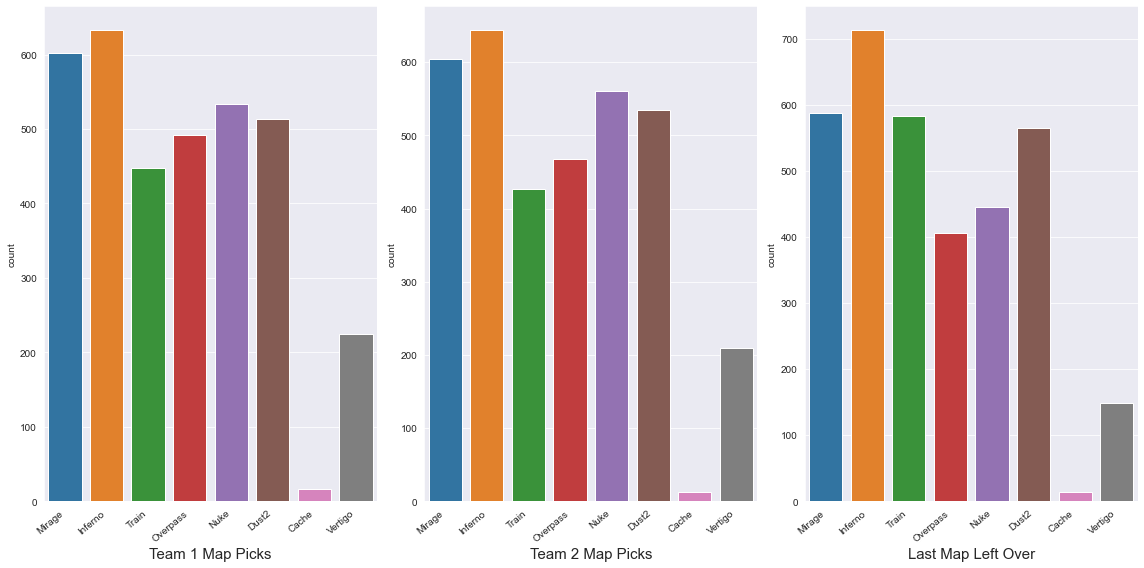

In [328]:
maps = ['Mirage', 'Inferno', 'Train', 'Overpass', 'Nuke', 'Dust2', 'Cache', 'Vertigo']
f, ax = plt.subplots(1,3,figsize=(16,8))

sns.countplot(x='t1_picked_1', data=vertigo_df, ax=ax[0], order=maps)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_xlabel('Team 1 Map Picks', fontsize=15)

sns.countplot(x='t2_picked_1', data=vertigo_df, ax=ax[1], order=maps)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
ax[1].set_xlabel('Team 2 Map Picks', fontsize=15)

sns.countplot(x='left_over', data=vertigo_df, ax=ax[2], order=maps)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")
ax[2].set_xlabel('Last Map Left Over', fontsize=15)
plt.tight_layout()

[Text(0, 0, 'First Veto'), Text(1, 0, 'Second Veto')]

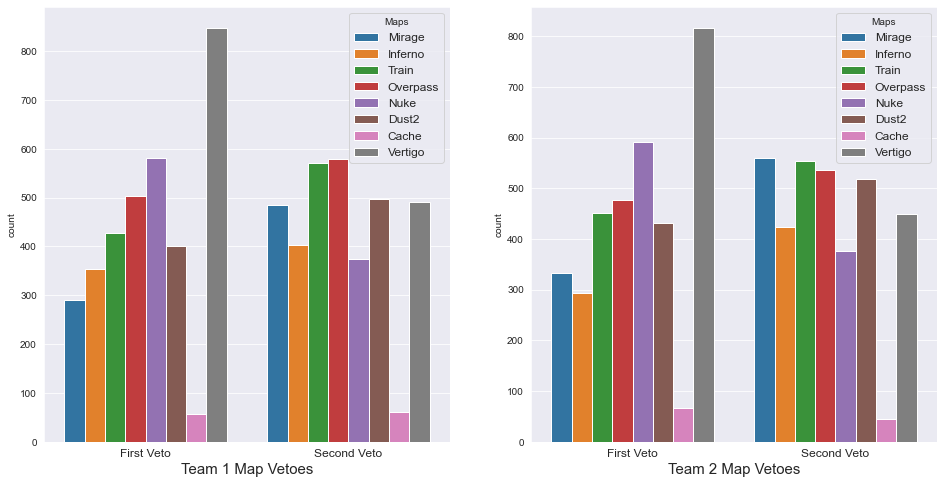

In [329]:
maps = ['Mirage', 'Inferno', 'Train', 'Overpass', 'Nuke', 'Dust2', 'Cache', 'Vertigo']
f, ax = plt.subplots(1,2,figsize=(16,8))
melt_df_1 = vertigo_df[['t1_removed_1', 't1_removed_2']]
melt_df_2 = vertigo_df[['t2_removed_1', 't2_removed_2']]

sns.countplot(x='variable', hue='value', data=pd.melt(melt_df_1), ax=ax[0], hue_order=maps)
ax[0].set_xlabel('Team 1 Map Vetoes', fontsize=15)
ax[0].legend(title='Maps', fontsize=12)
ax[0].set_xticklabels(['First Veto', 'Second Veto'], fontsize=12)

sns.countplot(x='variable', hue='value', data=pd.melt(melt_df_2), ax=ax[1], hue_order=maps)
ax[1].set_xlabel('Team 2 Map Vetoes', fontsize=15)
ax[1].legend(title='Maps', fontsize=12)
ax[1].set_xticklabels(['First Veto', 'Second Veto'], fontsize=12)

Once we only look at data once Vertigo is introduced the tendancies of map vetoes changes and Vertigo becomes the most popular map veto, while Nuke is still second most popular.

In [330]:
picks_2016 = picks[picks['date'].dt.year == 2016]
picks_2017 = picks[picks['date'].dt.year == 2017]
picks_2018 = picks[picks['date'].dt.year == 2018]
picks_2019 = picks[picks['date'].dt.year == 2019]
picks_2020 = picks[picks['date'].dt.year == 2020]

In [331]:
dict_2016 = dict(picks_2016['t1_picked_1'].value_counts())
dict_2017 = dict(picks_2017['t1_picked_1'].value_counts())
dict_2018 = dict(picks_2018['t1_picked_1'].value_counts())
dict_2019 = dict(picks_2019['t1_picked_1'].value_counts())
dict_2020 = dict(picks_2020['t1_picked_1'].value_counts())

In [332]:
dict(picks_2017['t1_picked_1'].value_counts())

{'Mirage': 460,
 'Inferno': 344,
 'Train': 338,
 'Cobblestone': 335,
 'Cache': 332,
 'Overpass': 284,
 'Nuke': 181,
 'Dust2': 16}

In [333]:
pd.DataFrame([dict_2016, dict_2017, dict_2018, dict_2019, dict_2020], columns=maps, index=[2016, 2017, 2018, 2019, 2020])

Mirage  Inferno  Train  Overpass  Nuke  Dust2  Cache  Vertigo
2016     107        2     86        54    47     91   95.0      NaN
2017     460      344    338       284   181     16  332.0      NaN
2018     672      613    409       409   262    246  391.0      NaN
2019     620      644    440       507   519    514   78.0    171.0
2020      95      104     83        70    81     92    NaN     53.0

In [334]:
def plot_maps(date_range=None, column='t1_picked_1'):
    """ Plot column frequency by a date range. Default will be team 1 map picks with the full dataset.
    """
    assert column in ['t1_removed_1', 't1_removed_2', 't2_removed_1', 't2_removed_2', 't1_picked_1', 't2_picked_2', 'left_over']
    new_df = pd.DataFrame(None, columns=['Mirage', 'Inferno', 'Train', 'Overpass', 'Nuke', 'Dust2', 'Cache', 'Cobblestone', 'Vertigo'])
    if date_range is None:
        for index, row in picks.sort_values(by='date',ascending=True).iterrows():
            map_pick = row[column]
            date = row['date']
            if math.isnan(new_df[map_pick].max()):
                new_df.loc[date, map_pick] = 1
            else:
                new_df.loc[date, map_pick] = new_df[map_pick].max() + 1
    else:
        df = picks[(picks['date'] > date_range[0]) & (picks['date'] < date_range[1])].sort_values(by='date',ascending=True)
        for index, row in df.sort_values(by='date',ascending=True).iterrows():
            map_pick = row[column]
            date = row['date']
            if math.isnan(new_df[map_pick].max()):
                new_df.loc[date, map_pick] = 1
            else:
                new_df.loc[date, map_pick] = new_df[map_pick].max() + 1
    return new_df

In [335]:
df = plot_maps()

<AxesSubplot:>

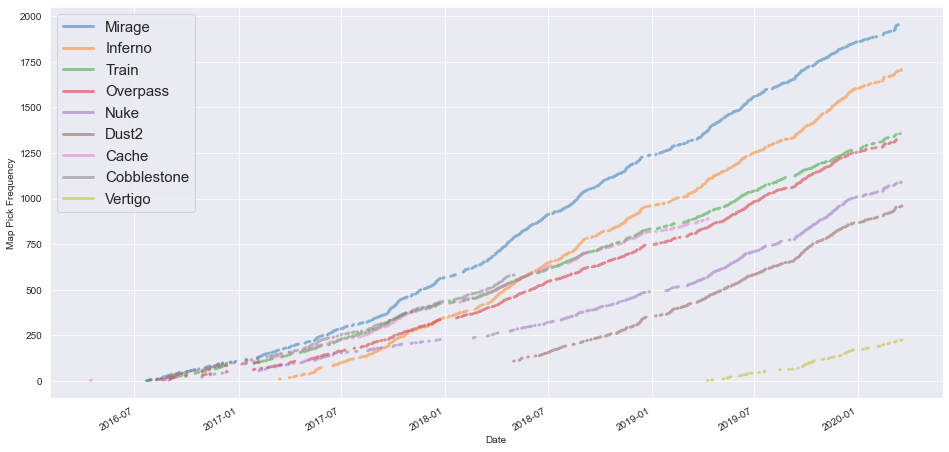

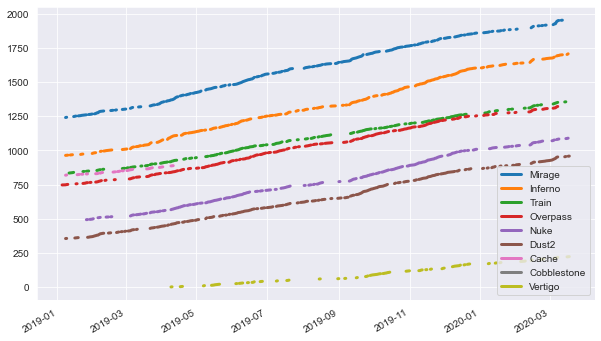

In [364]:
df.plot(figsize=(16,8), lw=3, ylabel= 'Map Pick Frequency', xlabel='Date', fontsize=10, alpha=0.5)
plt.legend(prop={'size': 15})

df.loc['2019':].plot(figsize=(10,6), lw=3)

In [348]:
picks[picks['t1_removed_1'] == 'Vertigo'].sort_values(by='date', ascending=True)

date           team_1    team_2  match_id  event_id t1_removed_1  \
4706 2019-04-02            x-kom   Tricked   2332184      4513      Vertigo   
4630 2019-04-08  ALTERNATE aTTaX   Tricked   2332324      4513      Vertigo   
4610 2019-04-09      WePlayGames  Imperial   2332219      4520      Vertigo   
4625 2019-04-09          Windigo    Unique   2332433      4433      Vertigo   
4588 2019-04-10          Windigo   Epsilon   2332441      4513      Vertigo   
...         ...              ...       ...       ...       ...          ...   
52   2020-03-14         Imperial   Reapers   2340431      5245      Vertigo   
37   2020-03-15          Orgless  Dignitas   2340338      5242      Vertigo   
14   2020-03-17         Japaleno    pro100   2340448      5150      Vertigo   
10   2020-03-17           Espada   Tricked   2340455      5247      Vertigo   
0    2020-03-18          TeamOne   Recon 5   2340454      5151      Vertigo   

     t1_removed_2 t2_removed_1 t2_removed_2 t1_picked_1 t2_picked_1 left_over  
4706     Overpass      Inferno       Mirage        Nuke       Train     Dust2  
4630        Dust2     Overpass        Train     Inferno        Nuke    Mirage  
4610         Nuke     Overpass       Mirage     Inferno       Train     Dust2  
4625      Inferno     Overpass         Nuke       Dust2      Mirage     Train  
4588        Train     Overpass        Dust2        Nuke      Mirage   Inferno  
...           ...          ...          ...         ...         ...       ...  
52           Nuke     Overpass        Dust2       Train      Mirage   Inferno  
37          Dust2       Mirage     Overpass       Train        Nuke   Inferno  
14         Mirage         Nuke     Overpass     Inferno       Dust2     Train  
10        Inferno     Overpass       Mirage       Dust2        Nuke     Train  
0           Train         Nuke     Overpass       Dust2     Inferno    Mirage  

[848 rows x 12 columns]

In [347]:
picks[picks['t1_removed_1'] == 'Vertigo'].first_valid_index()

0

In [346]:
picks.loc[4706, 'date']

Timestamp('2019-04-02 00:00:00')

In [350]:
picks.loc[0, 'date']

Timestamp('2020-03-18 00:00:00')

In [351]:
df2 = plot_maps(date_range=['2019-04-02', '2020-03-18'], column='t1_removed_1')

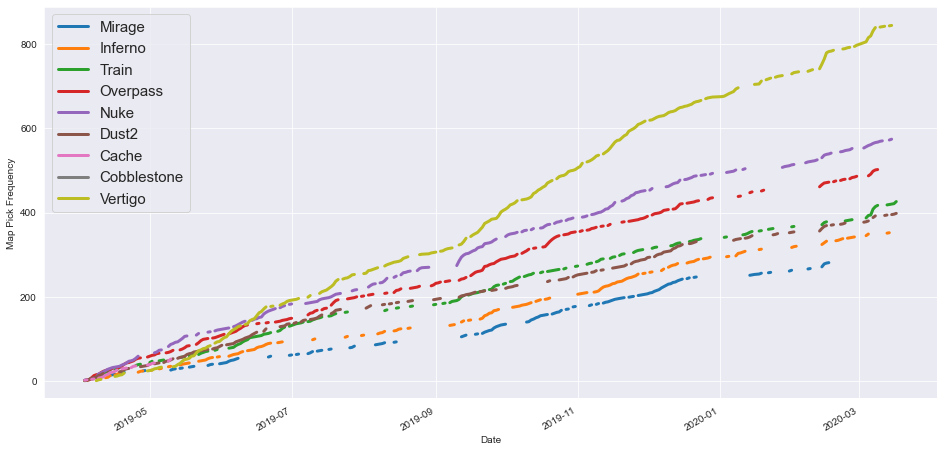

In [363]:
df2.plot(figsize=(16,8), lw=3, ylabel= 'Map Pick Frequency', xlabel='Date', fontsize=10)
plt.legend(prop={'size': 15})

Final takeaways from the picks dataset:
- In 2019 and 2020 Vertigo dominates the first map veto, this is because it was a new map introduced into the map pool and teams generally did not want to play on it.
- Note that the data from 2020 is only up until March, otherwise the bulk of the games played were between 2017 and the end of the dataset March 2020.
- Mirage and Inferno seem to be the most favoured maps that the teams want to play on.